In [3]:
import sklearn
import numpy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!pip install scikit-learn==1.3.0

In [4]:
#load the csv data
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
#deleting id column
df = df.drop(columns = ['Id'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
#displaying basic stats of data
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
#display number of samples on each class
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [9]:
#check null values
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [10]:
df['Sepal.Length'].hist()

KeyError: 'Sepal.Length'

<AxesSubplot:>

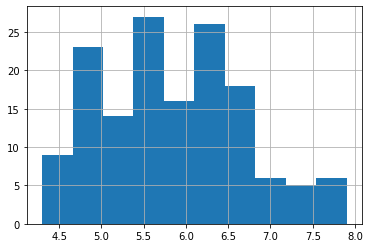

In [11]:
df['SepalLengthCm'].hist()

<AxesSubplot:>

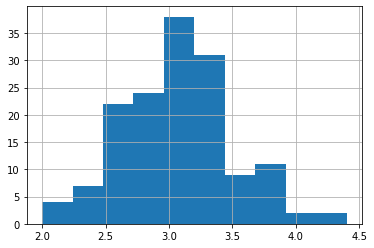

In [12]:
df['SepalWidthCm'].hist()

<AxesSubplot:>

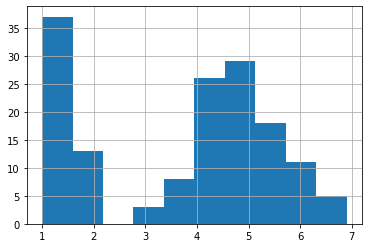

In [13]:
df['PetalLengthCm'].hist()

<AxesSubplot:>

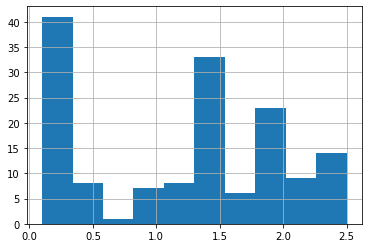

In [14]:
df['PetalWidthCm'].hist()

In [15]:
#create List of colors and class Labels
colors = ['red','orange','blue']
species = ['virginica','versicolor','setosa']

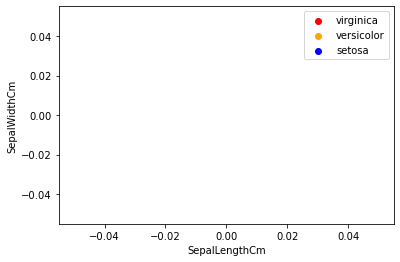

In [16]:
for i in range(3):
    #filter data on each class
    x = df[df['Species'] == species[i]]
    #plot the scatter plot
    plt.scatter(x['SepalLengthCm'], x['SepalWidthCm'], c = colors[i], label=species[i])
plt.xlabel("SepalLengthCm")
plt.ylabel("SepalWidthCm")
plt.legend()

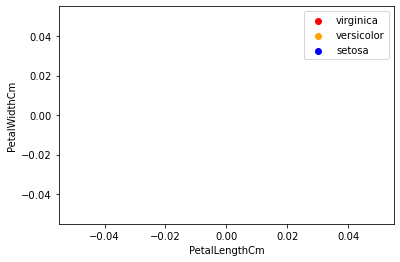

In [17]:
for i in range(3):
    #filter data on each class
    x = df[df['Species'] == species[i]]
    #plot the scatter plot
    plt.scatter(x['PetalLengthCm'], x['PetalWidthCm'], c = colors[i], label=species[i])
plt.xlabel("PetalLengthCm")
plt.ylabel("PetalWidthCm")
plt.legend()

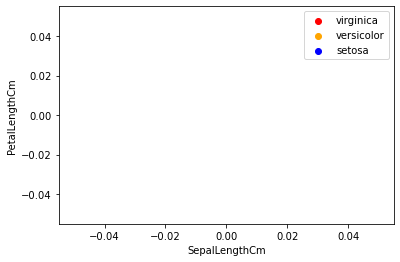

In [18]:
for i in range(3):
    #filter data on each class
    x = df[df['Species'] == species[i]]
    #plot the scatter plot
    plt.scatter(x['SepalLengthCm'], x['PetalLengthCm'], c = colors[i], label=species[i])
plt.xlabel("SepalLengthCm")
plt.ylabel("PetalLengthCm")
plt.legend()

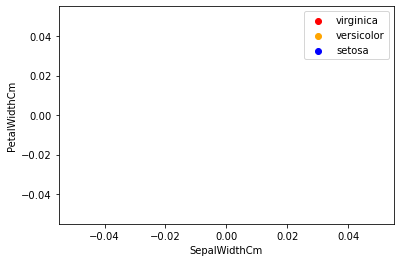

In [19]:
for i in range(3):
    #filter data on each class
    x = df[df['Species'] == species[i]]
    #plot the scatter plot
    plt.scatter(x['SepalWidthCm'], x['PetalWidthCm'], c = colors[i], label=species[i])
plt.xlabel("SepalWidthCm")
plt.ylabel("PetalWidthCm")
plt.legend()

In [20]:
#display the correlation matrix
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

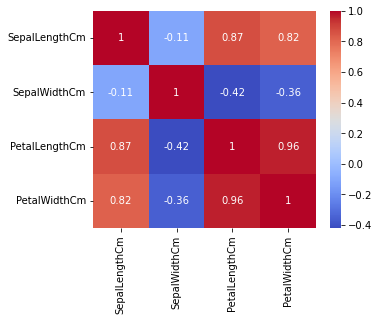

In [21]:
corr = df.corr()
#plot the heat map
fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(corr, annot=True, ax = ax, cmap = 'coolwarm')

In [ ]:
#from sklearn.preprocessing import LabelEncoder
#le = LabelEncoder()
# transform the string labels to integer
#df['Species'] = Le.fit_transform(df.['Species'])
#df.head()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbour import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import pickle

#input data
X = df.drop(columns = ['Species'])
#output data
Y = df['Species']
#split the data for train and test
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbour import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import pickle

#input data
X = df.drop(columns = ['Species'])
#output data
Y = df['Species']
#split the data for train and test
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)

ModuleNotFoundError: No module named 'sklearn.neighbour'

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import pickle

#input data
X = df.drop(columns = ['Species'])
#output data
Y = df['Species']
#split the data for train and test
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)

In [24]:
# Logistic Regression
model = LogisticRegression()
model.fit(x_train, y_train)
print("Logistic Regression Accuracy ", model.score(x_test, y_test) * 100)

Logistic Regression Accuracy  88.88888888888889


In [25]:
# model training
model.fit(x_train.values, y_train.values)

LogisticRegression()

In [26]:
# print metric to get performance
print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  88.88888888888889


In [27]:
# K-nearest neighbors
model = KNeighborsClassifier()
model.fit(x_train.values, y_train.values)
print("K-nearest neighbors Accuracy: ", model.score(x_test, y_test) * 100)

K-nearest neighbors Accuracy:  95.55555555555556


In [28]:
model.fit(x_train.values, y_train.values)

KNeighborsClassifier()

In [29]:
#print matric to get performance
print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  95.55555555555556


In [30]:
# Decision Tree
model = DecisionTreeClassifier()
model.fit(x_train.values, y_train.values)
print("Decision Tree Accuracy: ", model.score(x_test, y_test) * 100)

Decision Tree Accuracy:  91.11111111111111


In [31]:
model.fit(x_train.values, y_train.values)

DecisionTreeClassifier()

In [32]:
#print metric to get performance
print("Accuracy: ", model.score(x_test, y_test) * 100)

Accuracy:  91.11111111111111


In [33]:
# save the model
import pickle
filename = 'save_madel.sav'
pickle.dump(model, open(filename, 'wb'))

In [34]:
import pickle

In [49]:
# save the updated model
filename = 'saved_model.pkl'
try:
    with open(filename, 'wb') as file:
        pickle.dump(model, file)
    print("Model saved successfully.")
except Exception as e:
    print(f"Error saving the model: {e}")
    

Model saved successfully.


In [36]:
load_model = pickle.load(open(filename, 'rb'))

In [37]:
load_model.predict([[6.0, 2.2, 4.0, 1.0]])

array(['Iris-versicolor'], dtype=object)